# Control Systems Tutorial 
## Part A: Cable car dynamics

### The cable car model
The cable car has four states associated with the slider position and the angle of its suspension cable. The differential equation with states $(\varphi, \omega, x, v)\in [0, 2\pi) \times \mathbb{R}^3$ reads
$$\begin{align*}
M \ddot{x} &=  -\gamma \dot{x} - T(\varphi, \dot{\varphi}, \ddot{x}) \sin \varphi + F_\mathrm{c}\\
m \ddot{\varphi} &= -mg/l \sin \varphi + \cos \varphi \cdot \ddot{x} m
\end{align*}$$
where $v = \dot{x}$, $\omega = \dot{\varphi}$. 
The line tension is $$ T(\varphi, \dot{\varphi}, \ddot{x}) = mg \cos\varphi + m l \dot{\varphi}^2 - m l \ddot{x} \sin \varphi$$

In [42]:
import numpy as np
import matplotlib.pyplot as plt 
import control as ct
import control.optimal as opt
# from scipy.integrate import solve_ivp
from source.cablecar_model import cablecar_ode, cablecar_output

# System parameters 
M = 0.5; m1 = 0.02; m2 = 0.08; l = 0.2; g = 9.81; b1 = 4; b2 = 2; r = 0.02

cablecar_params = {
    "M": M,           # mass of the trolley
    "m1": m1,         # mass of the cable car
    "m2": m2,         # mass of pendulum rod
    "l": l,         # length of the suspension cable
    "g": g,         # gravitational acceleration
    "b1": b1,       # damping of the slider
    "b2": b2,       # damping of the cable car
    "r" : r         # ??
}

cablecar_sys = ct.nlsys(
    cablecar_ode, cablecar_output, name='cablecar',
    params=cablecar_params, states=['theta', 'omega', 'x', 'v'],
    outputs=['x', 'v'], inputs=['F'])

In [43]:
# Stable Steady state phase angle (analytical solution)

print(f"Stable steady state at x")
xeq, ueq = ct.find_operating_point(cablecar_sys, [0.0, 0.0, 0.0, 0.0], [0.0])

Stable steady state at x


In [ ]:
# Linearisation of the system around the stable steady state

cablecar_sys_linear = ct.linearize(cablecar_sys, xeq, ueq) 
np.linalg.eigvals(cablecar_sys_linear.A) # check eigenvalues of the linearised system

array([ 0.00000000e+00, -1.84945349e+03, -3.33265964e+00, -2.94305208e-02])

In [45]:
timepts = np.linspace(0, 10, 100)  # time points for simulation
# Input signal U (force) =1 until t=5, then 0
U = np.where(timepts <= 1, 0.1, 0.0)

resp = ct.input_output_response(cablecar_sys, timepts, U, xeq, cablecar_params)

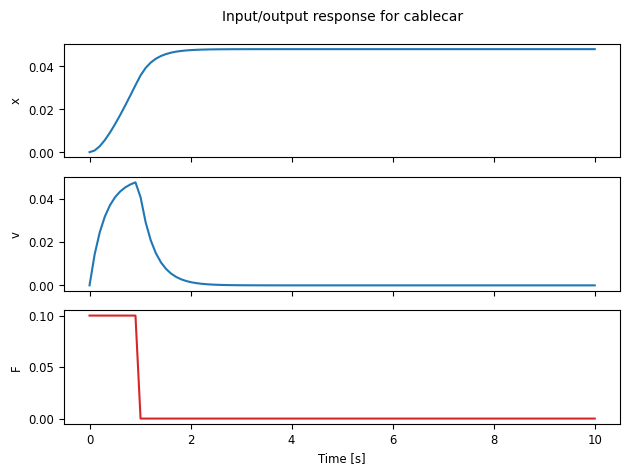

In [46]:
cplt = resp.plot()

In [ ]:
# Phase portrait of the system

In [ ]:
def control_output(t, x, z, params):
    # Get the parameters for the model
    K = params.get('K', np.zeros((2, 3)))   # nominal gain

    # Split up the input to the controller into the desired state and nominal input
    xd_vec = z[0]    # desired position ('x*')
    ud_vec = 0.0    # nominal input 
    x_vec = z[1]     # current state ('x')

    # Compute the control law
    return ud_vec - K @ (x_vec - xd_vec)

In [ ]:
# Define the controller system
K = 10.0
cablecar_control = ct.nlsys(
    None, control_output, name='control',
    inputs=['x', 'v'],
    outputs=['F'], params={'K': K})

In [ ]:
# Build the closed loop system
vehicle_closed = ct.interconnect(
    (cablecar_sys, cablecar_control),
    inputs=['xd', 'yd', 'thetad', 'vd', 'deltad'],
    outputs=['x', 'y', 'theta']
)


### Control Design

### Optimization-based control 

In [ ]:
# Optimal trajectory calculation
res = opt.solve_optimal_trajectory(sys, timepts, X0, cost, constraints)